In [0]:
from keras import applications
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [13]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [31]:
def add_box(image):
  margin = 30
  for i in range(margin, 224-margin):
    for j in range(margin//6, 224-margin//6):
      image[i, j, :] = np.random.uniform()
  return image

batch_size = 64
img_height, img_width = 224, 224

dir1train = "/content/drive/My Drive/DD2424 Project/Dataset/NEW/MANUAL_VALIDATION/unsorted_in_color/"
dir1val = "/content/drive/My Drive/DD2424 Project/Dataset/NEW/MANUAL_VALIDATION/unsorted_in_color_VAL/"

train_datagen1 = ImageDataGenerator(rescale=1./255,
    preprocessing_function=add_box,
    shear_range=0.2,
    zoom_range=[0.8, 0.85],
    horizontal_flip=True) # set validation split

train_generator1 = train_datagen1.flow_from_directory(
    dir1train,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary') # set as training data

validation_generator1 = train_datagen1.flow_from_directory(
    dir1val, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary') # set as validation data

dir2train = "/content/drive/My Drive/DD2424 Project/Dataset/NEW/MANUAL_VALIDATION/sorted_in_grayscale/"
dir2val = "/content/drive/My Drive/DD2424 Project/Dataset/NEW/MANUAL_VALIDATION/sorted_in_grayscale_VAL"

train_datagen2 = ImageDataGenerator(rescale=1./255,
    preprocessing_function=add_box,
    shear_range=0.2,
    zoom_range=[0.8, 0.85],
    horizontal_flip=True) # set validation split

train_generator2 = train_datagen2.flow_from_directory(
    dir2train,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary') # set as training data

validation_generator2 = train_datagen2.flow_from_directory(
    dir2val, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary') # set as validation data

Found 380 images belonging to 2 classes.
Found 161 images belonging to 2 classes.
Found 297 images belonging to 2 classes.
Found 101 images belonging to 2 classes.


1.0
0.0
0.0
1.0
0.0


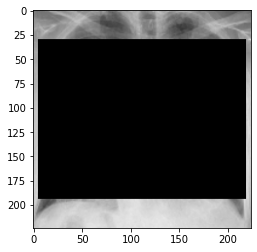

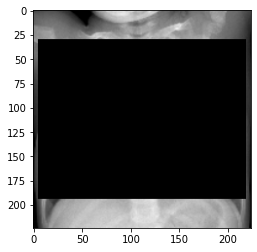

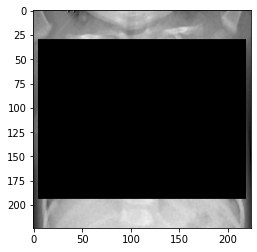

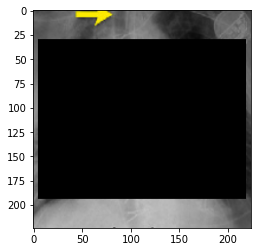

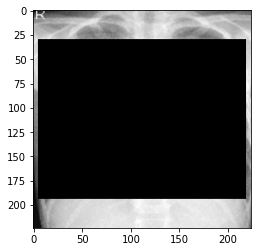

In [32]:
x_batch, y_batch = next(train_generator1)
for i in range (0,5):
    image = x_batch[i]
    #print(image.shape)
    plt.figure()
    plt.imshow(x_batch[i])
    print(y_batch[i])

0.0
0.0
0.0
1.0
1.0


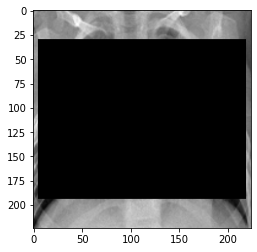

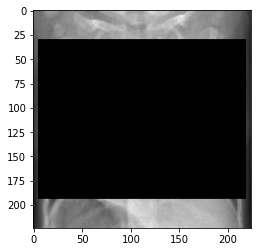

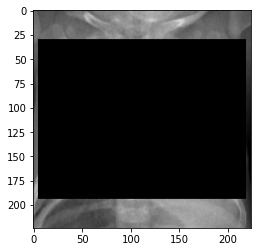

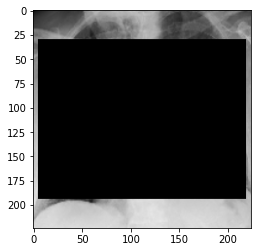

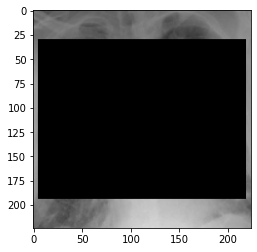

In [33]:
x_batch, y_batch = next(train_generator2)
for i in range (0,5):
    image = x_batch[i]
    #print(image.shape)
    plt.figure()
    plt.imshow(x_batch[i])
    print(y_batch[i])

Epoch 1/50


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 3 could not be retrieved. It could be because a worker has died.
  UserWarning)


5/5 [==============================] - 127s 25s/step - loss: 2.0276 - accuracy: 0.5728 - val_loss: 0.8878 - val_accuracy: 0.4688
Epoch 2/50
5/5 [==============================] - 41s 8s/step - loss: 0.6864 - accuracy: 0.6500 - val_loss: 0.6287 - val_accuracy: 0.4433
Epoch 3/50
5/5 [==============================] - 14s 3s/step - loss: 0.5836 - accuracy: 0.6154 - val_loss: 0.6223 - val_accuracy: 0.5258
Epoch 4/50
5/5 [==============================] - 19s 4s/step - loss: 0.5097 - accuracy: 0.7312 - val_loss: 0.4483 - val_accuracy: 0.9297
Epoch 5/50
5/5 [==============================] - 18s 4s/step - loss: 0.4201 - accuracy: 0.8956 - val_loss: 0.5443 - val_accuracy: 0.6598
Epoch 6/50
5/5 [==============================] - 15s 3s/step - loss: 0.4348 - accuracy: 0.8133 - val_loss: 0.3310 - val_accuracy: 0.9485
Epoch 7/50
5/5 [==============================] - 19s 4s/step - loss: 0.3491 - accuracy: 0.9082 - val_loss: 0.3619 - val_accuracy: 0.9375
Epoch 8/50
5/5 [===========================

Text(0, 0.5, 'loss and accuracy')

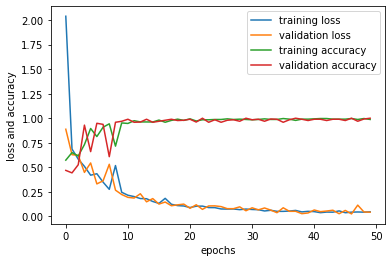

In [24]:
nb_epochs = 50

model_vgg = applications.VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224,224, 3))) # VGG16 without the fully connected layers
#model_vgg = applications.ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224,224, 3))) # ResNet50 without the fully connected layers

for layer in model_vgg.layers:
  layer.trainable = False # don't train these

model_fc = Sequential()
model_fc.add(Flatten(input_shape=model_vgg.output_shape[1:])) # Flatten so that they fit
model_fc.add(Dense(128, activation='relu')) # new fc layer
model_fc.add(Dropout(0.25))
model_fc.add(Dense(1, activation='sigmoid')) # prediction layer

model = Model(inputs=model_vgg.input, outputs=model_fc(model_vgg.output)) # merges them

model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy']) # I chose SGD becaues it's seemed to be the most easy to understand optimizer

history = model.fit_generator(
    train_generator1,
    steps_per_epoch = train_generator1.samples // batch_size,
    validation_data = validation_generator1, 
    validation_steps = validation_generator1.samples // batch_size,
    epochs = nb_epochs)

plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss and accuracy')

In [0]:
model.save_weights(filepath='/content/drive/My Drive/DD2424 Project/Results/cross_validation_unsorted_on_sorted/unsorted_in_color.txt')

In [30]:
model.evaluate(validation_generator1) # NU MED PATCH!

3/3 [==============================] - 26s 9s/step


[2.7167253494262695, 0.5031055808067322]

In [36]:
model.predict(validation_generator1)

array([[0.99608   ],
       [0.9980045 ],
       [0.9978188 ],
       [0.9970464 ],
       [0.9954129 ],
       [0.9972621 ],
       [0.99488294],
       [0.9974815 ],
       [0.9953981 ],
       [0.9977196 ],
       [0.997437  ],
       [0.9972594 ],
       [0.997227  ],
       [0.9970945 ],
       [0.9945476 ],
       [0.99782276],
       [0.99441355],
       [0.9949804 ],
       [0.99784493],
       [0.99762625],
       [0.99398994],
       [0.9970566 ],
       [0.9962405 ],
       [0.9960031 ],
       [0.9959428 ],
       [0.9979265 ],
       [0.997917  ],
       [0.99702245],
       [0.9964574 ],
       [0.99765956],
       [0.99781394],
       [0.9950578 ],
       [0.99699926],
       [0.9939798 ],
       [0.99761415],
       [0.9947055 ],
       [0.9929093 ],
       [0.99615085],
       [0.99739146],
       [0.9975083 ],
       [0.9960181 ],
       [0.99810624],
       [0.9958405 ],
       [0.99335176],
       [0.9914103 ],
       [0.99592507],
       [0.9977253 ],
       [0.996

In [34]:
model.evaluate(validation_generator2)

2/2 [==============================] - 16s 8s/step


[4.341122627258301, 0.20792078971862793]

In [35]:
model.predict(validation_generator2)

array([[0.9936978 ],
       [0.9946075 ],
       [0.9975292 ],
       [0.99439865],
       [0.9978295 ],
       [0.9953622 ],
       [0.99406356],
       [0.9955857 ],
       [0.99594194],
       [0.99479747],
       [0.99467176],
       [0.9978801 ],
       [0.9948664 ],
       [0.9935196 ],
       [0.99380255],
       [0.99491477],
       [0.995908  ],
       [0.9964922 ],
       [0.99298906],
       [0.9949555 ],
       [0.99194497],
       [0.9955728 ],
       [0.9940025 ],
       [0.9950406 ],
       [0.9942443 ],
       [0.9949555 ],
       [0.9963198 ],
       [0.9976634 ],
       [0.99781585],
       [0.99414176],
       [0.9968779 ],
       [0.99632275],
       [0.99392647],
       [0.99546707],
       [0.9940931 ],
       [0.9969693 ],
       [0.99550676],
       [0.9945133 ],
       [0.9929785 ],
       [0.9954926 ],
       [0.9951723 ],
       [0.99572456],
       [0.9957339 ],
       [0.99246323],
       [0.996581  ],
       [0.99442923],
       [0.9978235 ],
       [0.997